# Visualization of the previous indicators

In [1]:
#importing the functions file
import sys  
import pandas as pd
sys.path.insert(0, '/root/work/functions.py')
from functions import *

In [2]:
class Stock:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    def __init__(self, name):
        self.name = name
        self.data = create_dataframe(name+'.aspx')
    
    #methods to get the max and min of different columns
    def return_max(self):
        return max(self.data['closing'])
    def return_min(self):
        return min(self.data['closing'])
    def volume_max(self):
        return max(self.data['volume'])
    def quantity_max(self):
        return max(self.data['quantity'])

        
    
    def plot_graph(self):
        # Create figure with secondary y-axis
        fig = make_subplots(specs=[[{"secondary_y": True}]])
        # Add traces(the price graph)
        fig.add_trace(go.Scatter(x=data['date'], y=data['closing'], name="closing price"),secondary_y=False,)
        
        #add the volume graph
        fig.add_trace(
            go.Scatter(x=data['date'], y=data['volume'],name='volume'),
            secondary_y=True,
        )
        #change the size of the figure
        fig.update_layout(
            autosize=False,
            width=900,
            height=500,paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',title=self.name+' Stock')
        # Set x-axis title
        fig.update_xaxes(title_text="Date")

        # Set y-axes titles
        fig.update_yaxes(title_text="<b>Price</b>", secondary_y=False,autorange=False)
        fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=True)
        fig.update_yaxes(range=[50,1600], secondary_y=False)
        fig.show()

        
    #the function that calculate the momentum indcator
    def momentum_indicator(self, column, time_steps):
        subdata = self.data[['date', column]].copy()
        for step in time_steps:
            momentum_col = f"{column}_momentum_{step}"
            subdata[momentum_col] = subdata[column].shift(step) - subdata[column]
        return subdata
# The Data variable is the data of the stock
# The column variable is the closing price column
# The step variable is the subtraction range (nb of days)

    #the function that calculate the
    def simple_moving_average(self, period):
        df = self.data.copy()
        df["moving_avg"] = df["closing"].rolling(window=period).mean()
        return df


In [3]:
s1 = Stock('SLAFIN')
data=s1.data

### Calculating the moving average and the momentom

In [4]:
ma=s1.simple_moving_average(2)
ma

,date,closing,adjusted,evolution,quantity,volume,moving_avg
0,2020-01-04,631.7,631.7,0.00,0.0,0.0,NaN
1,2020-01-06,515.0,515.0,0.00,0.0,0.0,573.35
2,2020-01-07,527.5,527.5,-1.22,29.0,15336.5,521.25
3,2020-01-09,481.0,481.0,0.21,5.0,2405.0,504.25
4,2020-01-10,480.0,480.0,0.78,7.0,3342.3,480.50
...,...,...,...,...,...,...,...
727,2022-12-05,731.0,731.0,5.94,948.0,674080.0,736.50
728,2022-12-07,615.0,615.0,0.00,0.0,0.0,673.00
729,2022-12-08,622.0,622.0,0.00,0.0,0.0,618.50
730,2022-12-09,664.0,664.0,0.00,0.0,0.0,643.00


In [5]:
momen=s1.momentum_indicator('closing',[2,4,6,8])
momen

,date,closing,closing_momentum_2,closing_momentum_4,closing_momentum_6,closing_momentum_8
0,2020-01-04,631.7,NaN,NaN,NaN,NaN
1,2020-01-06,515.0,NaN,NaN,NaN,NaN
2,2020-01-07,527.5,104.2,NaN,NaN,NaN
3,2020-01-09,481.0,34.0,NaN,NaN,NaN
4,2020-01-10,480.0,47.5,151.7,NaN,NaN
...,...,...,...,...,...,...
727,2022-12-05,731.0,-56.0,-213.9,-181.0,-181.0
728,2022-12-07,615.0,127.0,-67.0,-65.0,-72.0
729,2022-12-08,622.0,109.0,53.0,-104.9,-72.0
730,2022-12-09,664.0,-49.0,78.0,-116.0,-114.0


## Now let's create the function

In [6]:
# Declare plotly figure (go)
import plotly
fig=go.Figure()
# add subplot properties when initializing fig variable ***don't forget to import plotly!!!***
fig = plotly.subplots.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.01, row_heights=[0.2,0.1,0.1])



fig.add_trace(go.Scatter(x=ma['date'], y=ma['closing'],
                name='close price' ))


fig.add_trace(go.Scatter(x=ma['date'], y=ma['moving_avg'],name='Moving avg' ))

fig.add_trace(go.Scatter(x=data['date'][:len(ma)], 
                     y=data['volume'][:len(ma)], name='volume'
                    ), row=2, col=1)


fig.add_trace(go.Bar(x=momen['date'], y=momen['closing_momentum_2'][:len(ma)],name='momentum1'
                    ), row=3, col=1)



# Update the layout by changing the figure size, hiding the legend and rangeslider
fig.update_layout(height=700, width=1100, 
                  showlegend=False, 
                  xaxis_rangeslider_visible=False,title='Stock name')


# update y-axis label
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)
fig.update_yaxes(title_text="Momentum", row=3, col=1)
fig.show()

## Now lets add it as a method to the class Stock

In [7]:
class Stock:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly
    def __init__(self, name):
        self.name = name
        self.data = create_dataframe(name+'.aspx')
    
    #methods to get the max and min of different columns
    def return_max(self):
        return max(self.data['closing'])
    def return_min(self):
        return min(self.data['closing'])
    def volume_max(self):
        return max(self.data['volume'])
    def quantity_max(self):
        return max(self.data['quantity'])

        
    
    def plot_graph(self,Type):

        # Create figure with secondary y-axis
        fig = make_subplots(specs=[[{"secondary_y": True}]])
        # Add traces(the price graph)
        fig.add_trace(go.Scatter(x=data['date'], y=data[Type], name=Type),secondary_y=False,)
        
        #add the volume graph
        fig.add_trace(
            go.Scatter(x=data['date'], y=data['volume'],name='volume'),
            secondary_y=True,
        )
        #change the size of the figure
        fig.update_layout(
            autosize=False,
            width=900,
            height=500,paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',title=self.name+' Stock')
        # Set x-axis title
        fig.update_xaxes(title_text="Date")

        # Set y-axes titles
        fig.update_yaxes(title_text="<b>Price</b>", secondary_y=False,autorange=False)
        fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=True)
        fig.update_yaxes(range=[50,1600], secondary_y=False)
        fig.show()
        #becuase plotly doesn't show in github
        fig.write_image("img.png")
        
    #the function that calculate the momentum indcator
    def momentum_indicator(self, column, time_steps):
        subdata = self.data[['date', column]].copy()
        for step in time_steps:
            momentum_col = f"{column}_momentum_{step}"
            subdata[momentum_col] = subdata[column].shift(step) - subdata[column]
        return subdata

    #the function that calculate the
    def simple_moving_average(self, period):
        df = self.data.copy()
        df["moving_avg"] = df["closing"].rolling(window=period).mean()
        return df
    

### the function that plots the ma and momentum
    def plot_stats(self,period_ma,period_momen,mon):
        # Declare plotly figure (go)
        fig=go.Figure()
        # add subplot properties when initializing fig variable ***don't forget to import plotly!!!***
        fig = plotly.subplots.make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.01, row_heights=[0.2,0.1,0.1])
        data=self.data
        ma=self.simple_moving_average(period_ma)
        momen=self.momentum_indicator('closing',period_momen)
        fig.add_trace(go.Scatter(x=ma['date'], y=ma['closing'],
                        name='close price' ))


        fig.add_trace(go.Scatter(x=ma['date'], y=ma['moving_avg'],name='Moving avg '+str(period_ma)+' Days' ))

        fig.add_trace(go.Scatter(x=data['date'][:len(ma)], 
                            y=data['volume'][:len(ma)], name='volume'
                            ), row=2, col=1)


        fig.add_trace(go.Bar(x=momen['date'], y=momen['closing_momentum_'+str(mon)][:len(ma)],name='momentum '+str(mon)+' Days'
                            ), row=3, col=1)



        # Update the layout by changing the figure size, hiding the legend and rangeslider
        fig.update_layout(height=700, width=900, 
                        showlegend=True, 
                        xaxis_rangeslider_visible=False,title=self.name+' Stock')


        # update y-axis label
        fig.update_yaxes(title_text="Price", row=1, col=1)
        fig.update_yaxes(title_text="Volume", row=2, col=1)
        fig.update_yaxes(title_text="Momentum", row=3, col=1)
        fig.show()
        #becuase plotly doesn't show in github
        fig.write_image("img.png")



In [8]:
S=Stock('SLAFIN')

In [9]:
S.plot_graph('closing')

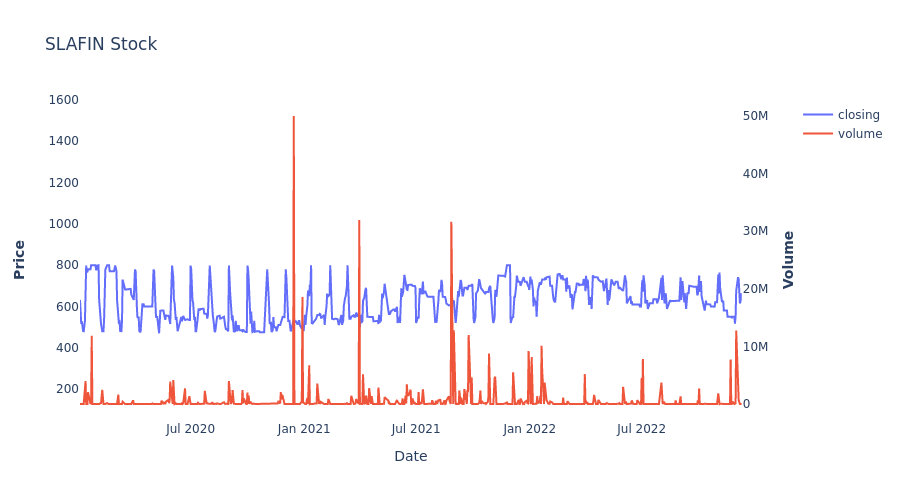

In [10]:
from IPython.display import Image
Image("img.png")

In [11]:
S.plot_stats(50,[10,20,30],30)

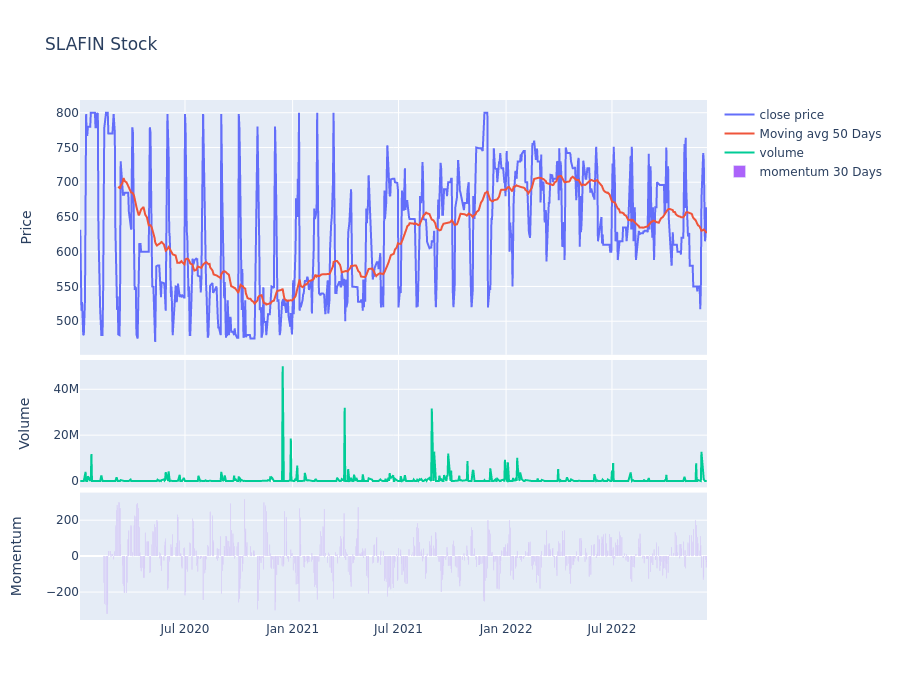

In [12]:
from IPython.display import Image
Image("img.png")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8eeb6fb9-2d6b-464e-b219-535fd1ffa708' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>